In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.sandbox.distributions.examples.matchdist import plothist

In [3]:
path = 'ex1data1.txt'
data = pd.read_csv(path,header = None,names = ['population','profit'])
data.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [1]:
data.plot(kind='scatter',x='profit',y='population',figsize=(12,12))


NameError: name 'data' is not defined

In [45]:
def computCost(X,Y,theta):
    return np.sum(np.power(X@theta.T-Y,2))
data

,ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [9]:
data.insert(0,'ones',1)

ValueError: cannot insert ones, already exists

In [11]:
cols= data.shape[1]
X = data.iloc[:,0:cols-1]
Y = data.iloc[:,cols-1:cols]


In [12]:
X.head()


,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [13]:
Y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [14]:
x = np.matrix(X.values)
y = np.matrix(Y.values)
theta = np.matrix(np.array([0,0]))
x.shape


(97, 2)

In [48]:
def gradient_descent(X,Y,theta,alpha,iteration):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    print(parameters)
    cost = np.zeros(iteration)
    print(X.shape)
    print(theta.T.shape)
    
    #代码最精髓的地方，用全为1的一列来和其他的参数保持计算的一致性，当X[:,j]全为1的时候，计算常数项的偏导式的表达式和计算非常熟项偏导的代码一致
    for i in range(iteration):
        error  =  (X@(theta.T)-Y)
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)
        theta = temp
#       print(computCost(x,y,theta))
        cost[i] = computCost(X,Y,theta)
    return theta,cost

In [16]:
alpha = 0.01
iter = 1000
X

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [17]:
g,cost = gradient_descent(x,y,theta,alpha,iter)
print(g)
cost

2
(97, 2)
(2, 1)
[[-3.24140214  1.1272942 ]]


array([1307.01495018, 1150.72915231, 1144.82401317, 1143.67434577,
       1142.67841896, 1141.69080674, 1140.70690122, 1139.72654438,
       1138.74971889, 1137.77641187, 1136.80661065, 1135.84030259,
       1134.87747512, 1133.9181157 , 1132.96221184, 1132.00975108,
       1131.06072104, 1130.11510935, 1129.17290369, 1128.23409181,
       1127.29866147, 1126.3666005 , 1125.43789676, 1124.51253815,
       1123.59051264, 1122.6718082 , 1121.75641289, 1120.84431478,
       1119.93550199, 1119.02996269, 1118.1276851 , 1117.22865745,
       1116.33286806, 1115.44030524, 1114.55095738, 1113.66481291,
       1112.78186027, 1111.90208798, 1111.02548458, 1110.15203865,
       1109.28173882, 1108.41457377, 1107.55053219, 1106.68960284,
       1105.83177451, 1104.97703602, 1104.12537626, 1103.27678412,
       1102.43124857, 1101.58875858, 1100.7493032 , 1099.91287148,
       1099.07945255, 1098.24903554, 1097.42160964, 1096.59716409,
       1095.77568814, 1094.9571711 , 1094.14160231, 1093.32897

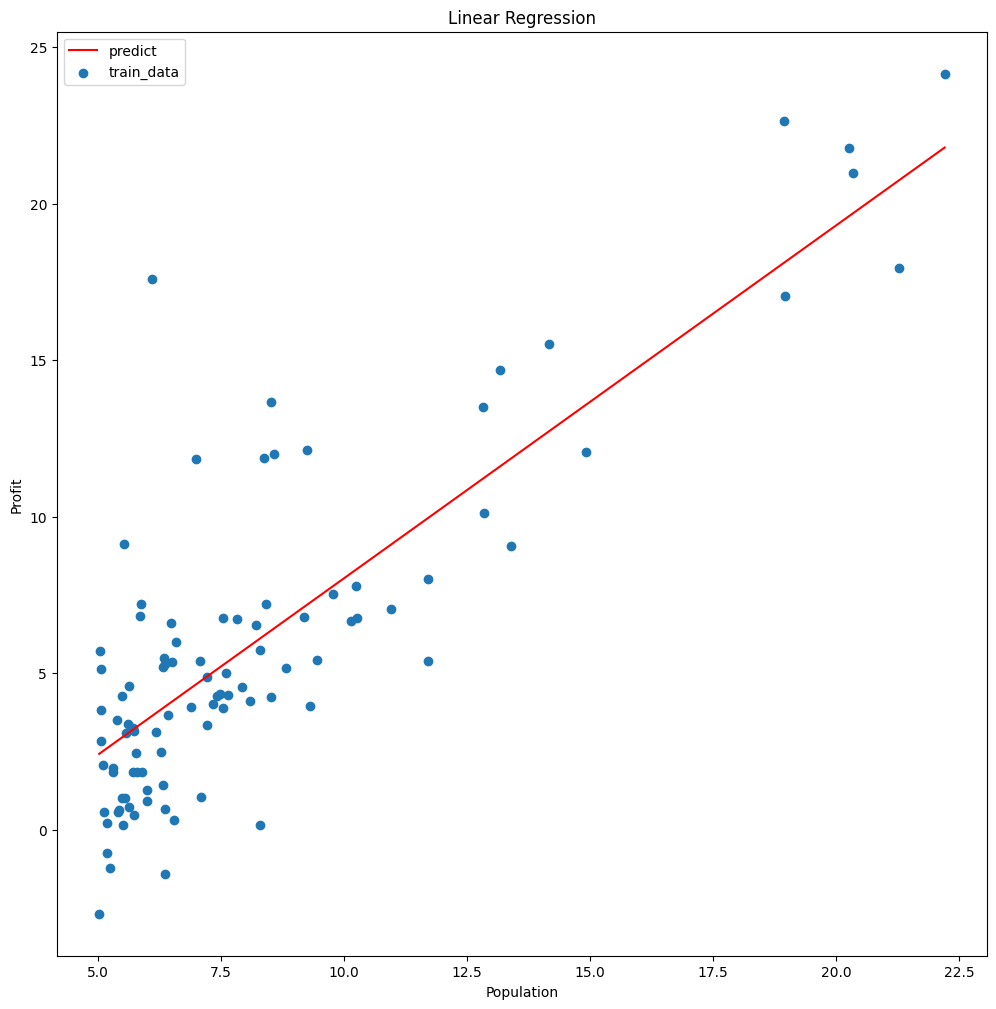

In [22]:
x= np.linspace(data['population'].min(),data['population'].max(),100)
f = g[0,0]+x*g[0,1]

fig , ax = plt.subplots(figsize=(12,12))
ax.plot(x,f,'r',label = 'predict')
ax.scatter(data['population'],data['profit'],label = 'train_data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Linear Regression')
plt.show()


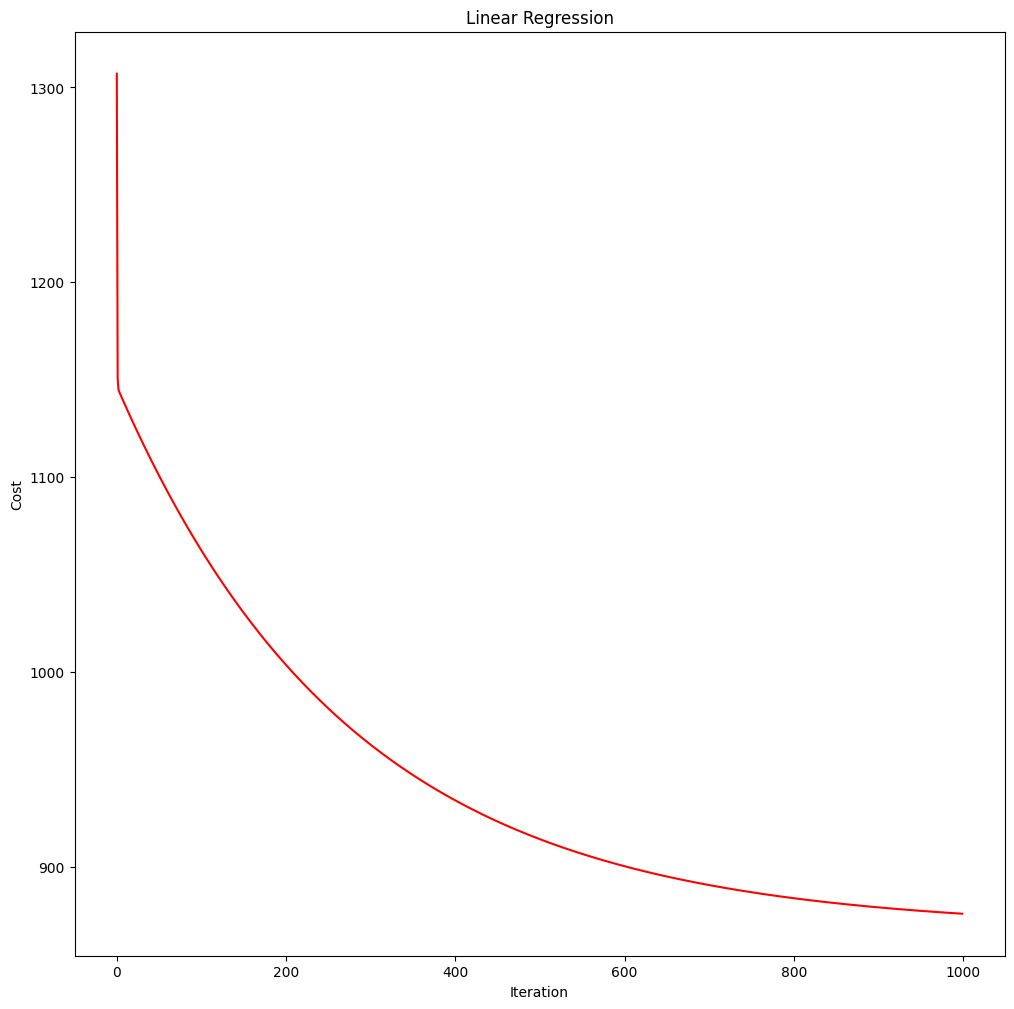

In [26]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(np.arange(iter),cost,'r',label = 'lost')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Linear Regression')
plt.show()

In [54]:
path1 = 'ex1data2.txt'
data2 = pd.read_csv(path1,header = None,names = ['size','bedroom','price'])
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [55]:
data2.insert(0,'ones',1)


In [56]:
data2.head()

,ones,size,bedroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [62]:
cut_data = data2.shape[1]
X2 = data2.iloc[:,0:cut_data-1]
print(X.shape)
Y2 = data2.iloc[:,cut_data-1:]
X2 = np.matrix(X2.values)
Y2 = np.matrix(Y2.values)


(47, 3)


In [63]:
theta = np.matrix(np.array([0,0,0]))
learning_rate = 0.01
iteration = 1000
g,cost = gradient_descent(X2,Y2,theta,learning_rate,iteration)

3
(47, 3)
(3, 1)


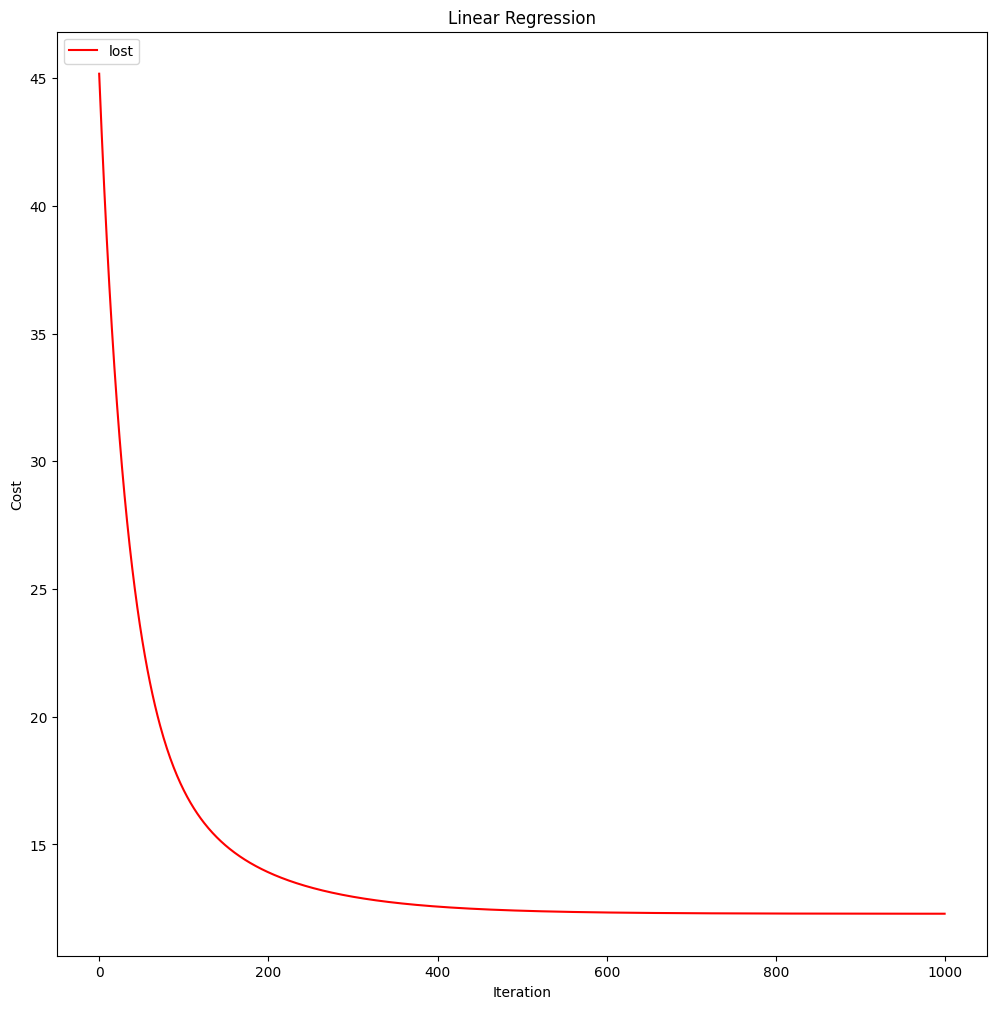

In [64]:
fig,ax = plt.subplots(figsize=(12,12))
ax.plot(np.arange(iteration),cost,'r',label = 'lost')
ax.legend(loc = 2)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Linear Regression')
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
data = pd.read_csv('ex1data1.txt',names=['population','profit'])
n = data.shape[1]
X = data.iloc[:,:n-1]
Y = data.iloc[:,n-1:]
X = np.asarray(X.values)
Y= np.asarray(Y.values)
model.fit(X,Y)

LinearRegression()

In [81]:
x=X
print(x.shape)
f = model.predict(x)
f

(97, 1)


array([[ 3.39377399],
       [ 2.6989512 ],
       [ 6.26719552],
       [ 4.45927234],
       [ 3.09515767],
       [ 6.10530086],
       [ 5.02381586],
       [ 6.33818102],
       [ 3.84247394],
       [ 2.13452698],
       [ 2.91727635],
       [13.00234766],
       [ 2.94507404],
       [ 6.13572322],
       [ 2.833764  ],
       [ 2.52202431],
       [ 3.69835548],
       [ 2.22460102],
       [ 3.77494824],
       [ 4.53992141],
       [ 3.48802365],
       [20.28701109],
       [ 2.65409313],
       [ 3.65146926],
       [ 2.74333205],
       [18.70624151],
       [11.40845471],
       [ 9.17628876],
       [11.82363042],
       [22.59314512],
       [ 2.37050903],
       [ 3.96559502],
       [ 7.13763287],
       [ 3.13333475],
       [ 5.90033768],
       [ 5.56903223],
       [ 5.7629002 ],
       [ 2.79272364],
       [11.41799898],
       [ 3.68403908],
       [ 2.55483273],
       [ 4.31527318],
       [10.07225703],
       [ 2.99243747],
       [ 5.43934948],
       [ 4

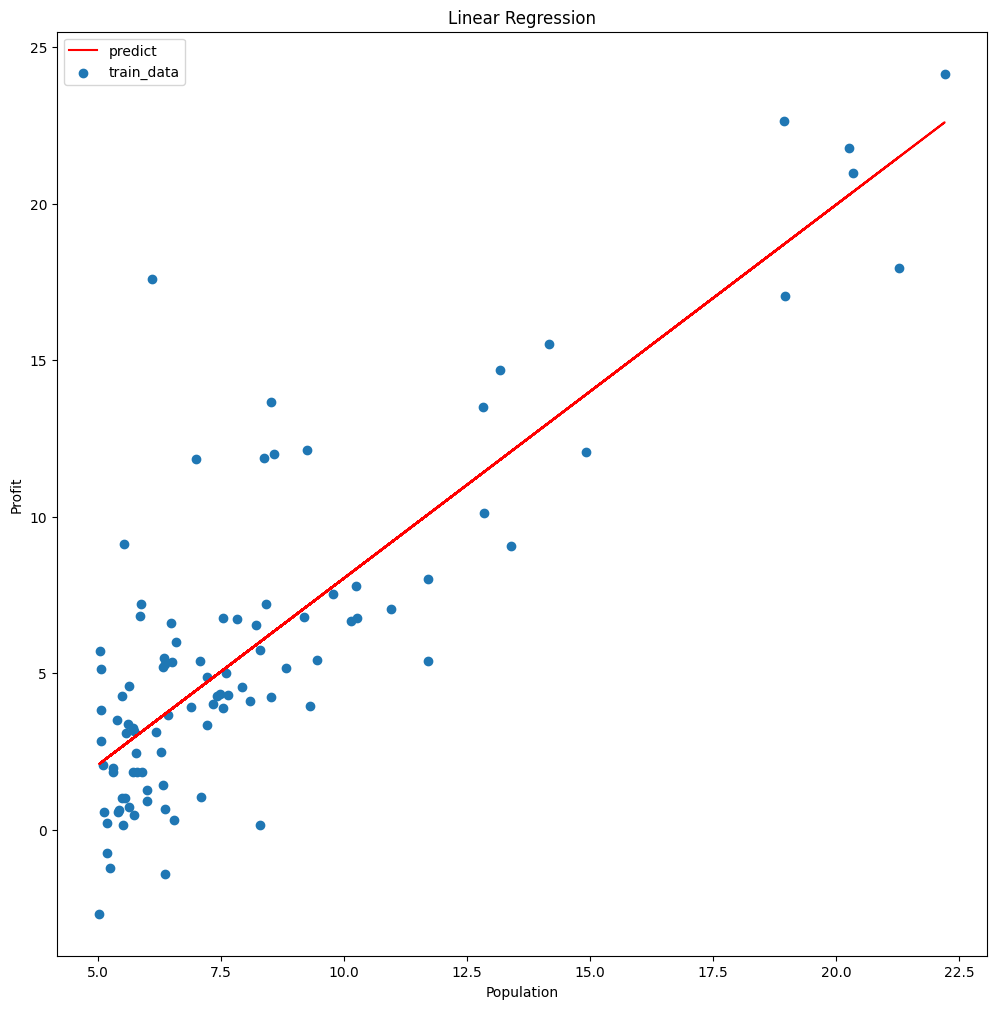

In [82]:
fig,ax = plt.subplots(figsize=(12,12))
ax.plot(x,f,'r',label = 'predict')
ax.scatter(data['population'],data['profit'],label = 'train_data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Linear Regression')
plt.show()